In [1]:
import keras.models

model = keras.models.load_model('mri_test.model')

In [2]:
import os
import cv2
import numpy as np

folder_path = 'C:/Users/USER/Desktop/images taken'
image_paths = os.listdir(folder_path)

images = []
for image_path in image_paths:
    image = cv2.imread(os.path.join(folder_path, image_path))
    image = cv2.resize(image, (224, 224))  # Resize the image to match the input size of the model
    images.append(image)

images = np.array(images)

In [3]:
import numpy as np

# Normalize the images
images = images.astype('float32') / 255.0

# Reshape the images if needed (e.g., for models that expect a batch dimension)
# images = np.reshape(images, (-1, 224, 224, 3))

In [4]:
predictions = model.predict(images)

1/1 [==============================] - 4s 4s/step


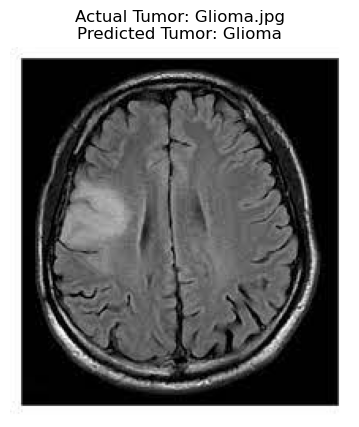

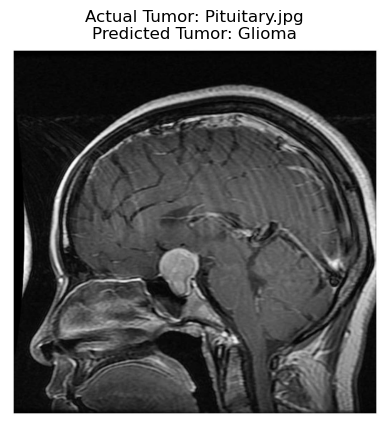

In [6]:
import matplotlib.pyplot as plt

class_labels = ['No Tumor','Meningioma','Glioma','Pituitary']

for i, prediction in enumerate(predictions):
    # Get the index of the class with the highest probability
    predicted_class_index = np.argmax(prediction)

    # Get the corresponding class labels
    predicted_class = class_labels[predicted_class_index]
    actual_class = image_paths[i].split('_')[0]  # Assuming the image filename format is 'TumorType_XXX.jpg'

    # Load and display the image
    image_path = os.path.join(folder_path, image_paths[i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure()
    plt.imshow(image)
    plt.title(f"Actual Tumor: {actual_class}\nPredicted Tumor: {predicted_class}")
    plt.axis('off')
    plt.show()

In [21]:
import tensorflow as tf
print(tf.__version__)

2.9.1
